A problem arises when recording data with electronic counters in that
the system may saturate when rates are very high, leading to a “dead
time.” For example, after a particle has passed through a detector, the
equipment will be “dead” while the detector recovers and the electronics
stores away the results. If a second particle passes through the
detector in this time period, it will not be counted.

1.  Assume that a counter has dead time of $200$ ns $(200 \times
        10^{-9} \text{s})$ and is exposed to a beam of $1 \times 10^6$
    particles per second so that the mean number of particles hitting
    the counter in the $200\text{-ns}$ time slot is $\mu = 0.2$. From
    the Poisson probability for this process, find the efficiency of the
    counter, that is, the ratio of the average number of particles
    counted to the average number that pass through the counter in the
    $200\text{-ns}$ time period.

2.  Repeat the calculation for beam rates of $2$, $4$, $6$, $8$, and
    $10 \times 10^6$ particles per second, and plot a graph of counter
    efficiency as a function of beam rate.




To find the efficiency, we can ask how many particles we expect in the
window after each counted particle. This will be
$$\frac{\text{uncounted}}{\text{counted}} = \sum_{n=0}^{\infty} np\left(n\right) =
\left<np\left(n\right)\right>$$

Where $p(n)$ follows is the poisson probability
$\frac{\mu^ne^{-\mu}}{n!}$. The fast way to solve this is to remember or
derive the factorial moments of the poisson distribution.
$$\begin{aligned}
\left<p\left(n\right)\right> &= \mu^0 \\
\left<np\left(n\right)\right> &= \mu^1 \\
\left<n(n-1)p\left(n\right)\right> &= \mu^2 \\
\text{...}\end{aligned}$$

Using this solution

$$\frac{\text{counted}}{\text{total}} =
\frac{\text{counted}}{\text{counted} + \text{uncounted}} = \frac{1}{1
  + \frac{\text{uncounted}}{\text{counted}}} = \frac{1}{1 +
  \left<np\left(n\right)\right>} = \frac{1}{1 + \mu}$$


,rate,mu,efficiency
0,1000000,0.2,0.83
1,2000000,0.4,0.71
2,4000000,0.8,0.56
3,6000000,1.2,0.45
4,8000000,1.6,0.38
5,10000000,2.0,0.33


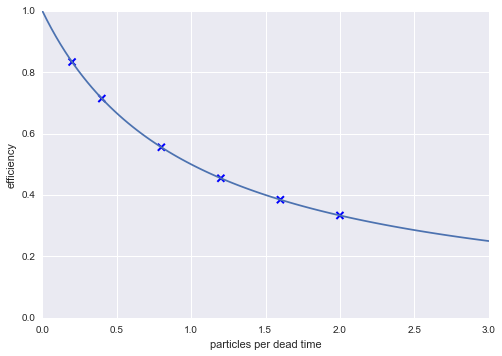

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("notebook")
pd.set_option('precision', 3)

def efficiency(mu):
    return 1.0/(1.0 + mu)

x = np.linspace(0, 3, 100)
rates = [10.0**6, 2*10**6, 4*10**6, 6*10**6, 8*10**6, 10**7]
mus = map(lambda rate: rate * 200 * 10**-9, rates)
efficiencies = map(efficiency, mus)

plt.plot(x, efficiency(x));
plt.scatter(mus, efficiencies, s=50, lw=2, marker='x')
plt.xlim([0, 3])
plt.ylim([0, 1])
plt.ylabel('efficiency');
plt.xlabel('particles per dead time');
pd.DataFrame.from_items([('rate', rates), ('mu', mus), ('efficiency', efficiencies)])
